In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel, load_vocab, loadmat

In [3]:
np.random.seed(1)

In [4]:
print("Loading data...")
data = loadmat("/Users/aleverentz/Code/anchor-word-recovery/M_nips.full_docs.mat.trunc.mat")["M"]
#data = loadmat("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts.mat")["M"]
print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
print("Nonzero entries: {}".format(data.nnz))
print("Loading vocab...")
vocab = load_vocab("/Users/aleverentz/Code/anchor-word-recovery/vocab.nips.txt.trunc")
#vocab = load_vocab("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts_vocab.txt")
print("Vocab size = {}".format(len(vocab)))
assert data.shape[0] == len(vocab)

Loading data...
Vocab size: 2940
Num documents: 1500
Nonzero entries: 585933
Loading vocab...
Vocab size = 2940


In [5]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import text_utils

In [6]:
%%time

data, vocab = text_utils.xml_to_sparse_term_doc(
    filename = "/Users/aleverentz/Downloads/ap/ap_mod_xml.txt",
    within = ["toplevel"],
    eachdoc = ["DOC", "TEXT"],
    parser_type = "lxml-xml",
    tokenizer = text_utils.default_tokenizer)

print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
assert data.shape[0] == len(vocab)

Vocab size: 42756
Num documents: 2246
CPU times: user 30.5 s, sys: 283 ms, total: 30.8 s
Wall time: 31.1 s


In [7]:
model = SimpleHierarchicalTopicModel(
    branching_factors = [5, 5], num_epochs = 100,
    batch_size = 100, vocab = vocab)

In [8]:
model.fit(data)
top_words = model.get_top_words_by_node(num_words = 10)
model.print_top_words_by_node(num_words = 10);

100%|██████████| 224600/224600 [1:03:11<00:00, 59.24it/s]


Top words by node:
()    : of, to, for, was, with, were, they, about, new, when
(0,)  : said, on, from, this, be, not, has, would, soviet, their
(1,)  : a, on, in, after, not, two, it, out, that, by
(2,)  : said, that, it, more, from, at, has, than, i, would
(3,)  : and, a, at, as, that, has, said, who, their, party
(4,)  : it, a, as, be, president, on, which, had, will, n't
(0, 0): the, them, said, down, 1986, an, through, kennedy, all, where
(0, 1): he, 's, said, down, them, monday, some, part, 20, all
(0, 2): the, he, down, said, monday, an, them, all, troops, across
(0, 3): the, in, he, 's, said, date, hotel, across, well, where
(0, 4): the, in, he, 's, said, down, all, through, no, war
(1, 0): in, is, a, are, by, but, have, just, get, them
(1, 1): in, a, are, but, students, that, have, them, by, company
(1, 2): in, a, 's, are, director, by, monday, get, just, year
(1, 3): is, are, 's, a, or, by, get, just, that, in
(1, 4): in, is, 's, a, by, or, that, have, monday, death
(2, 0): t

In [9]:
topic_vectors = model.get_expected_topic_vectors()

In [10]:
topic_vectors.shape

(31, 42756)

In [11]:
variance = topic_vectors.var(axis=0)
print(variance.shape)
np.linalg.norm(variance)

(42756,)


0.019369638998272435

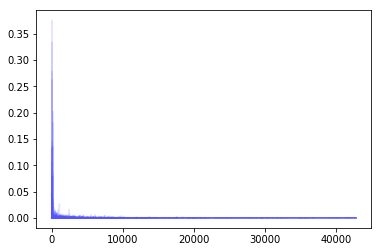

In [12]:
for i in range(10):
    plt.plot(topic_vectors[i,:], color='b', alpha=0.1);

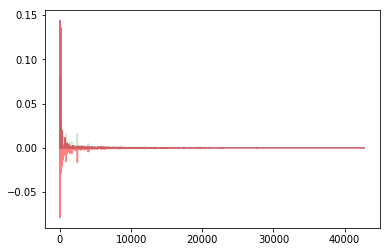

In [13]:
plt.plot(topic_vectors[0,:], color='b', alpha=0.2)
plt.plot(topic_vectors[1,:], color='g', alpha=0.2)
plt.plot(topic_vectors[0,:] - topic_vectors[1,:], color='r', alpha=0.5)
None